In [2]:
#importing the library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#importing the dataset using pandas
dataset = pd.read_csv('housing.csv')

In [4]:
#separating the features and label
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,9].values


In [14]:
#printing the data 
print(dataset.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200  


In [4]:
#dealing with missing value
from sklearn.preprocessing import Imputer
missingValueImputer = Imputer (missing_values = 'NaN', strategy = 'mean', 
                               axis = 0)
missingValueImputer = missingValueImputer.fit (X[:,4:5])
X[:,4:5] = missingValueImputer.transform(X[:,4:5])

In [5]:
#encoding the dataset
from sklearn.preprocessing import LabelEncoder
X_labelencoder = LabelEncoder()
X[:, 8] = X_labelencoder.fit_transform(X[:, 8])
print (X)

[[-122.23 37.88 41 ... 126 8.3252 3]
 [-122.22 37.86 21 ... 1138 8.3014 3]
 [-122.24 37.85 52 ... 177 7.2574 3]
 ...
 [-121.22 39.43 17 ... 433 1.7 1]
 [-121.32 39.43 18 ... 349 1.8672 1]
 [-121.24 39.37 16 ... 530 2.3886 1]]


In [6]:
# Implementing OneHotEncoder to separate category variables into dummy 
# variables.
#==============================================================================
from sklearn.preprocessing import OneHotEncoder
X_onehotencoder = OneHotEncoder (categorical_features = [8])
X = X_onehotencoder.fit_transform(X).toarray()
print (X)


[[0.0000e+00 0.0000e+00 0.0000e+00 ... 3.2200e+02 1.2600e+02 8.3252e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 2.4010e+03 1.1380e+03 8.3014e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 4.9600e+02 1.7700e+02 7.2574e+00]
 ...
 [0.0000e+00 1.0000e+00 0.0000e+00 ... 1.0070e+03 4.3300e+02 1.7000e+00]
 [0.0000e+00 1.0000e+00 0.0000e+00 ... 7.4100e+02 3.4900e+02 1.8672e+00]
 [0.0000e+00 1.0000e+00 0.0000e+00 ... 1.3870e+03 5.3000e+02 2.3886e+00]]


In [7]:
#spilt the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 0)


In [8]:
#feature scaling 

from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
X_train = independent_scalar.fit_transform (X_train) 
X_test = independent_scalar.transform (X_test)


In [9]:
#fitiing the linear regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
#predecting the value
y_pred = regressor.predict(X_test)

In [14]:
#checking the score
regressor.score(X_train,y_train)

0.6470029180391917

In [15]:

regressor.score(X_test,y_test)

0.6378963949226937

In [17]:
#RMSE
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test,y_pred)
print(rmse)


4721667709.864075


In [18]:
rmse1 = mean_squared_error(y_train,regressor.predict(X_train))
print(rmse1)

4724412342.208373


In [19]:
# *************************************************
#   fitting the dicision tree 
# *********************************

from sklearn.tree import DecisionTreeRegressor
DTRegressor = DecisionTreeRegressor(random_state=0)
DTRegressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [20]:
#predicting the value
y_predDT = DTRegressor.predict(X_test)


In [21]:
#checking the socre 
DTRegressor.score(X_train,y_train)

1.0

In [22]:
DTRegressor.score(X_test,y_test)

0.6424420549463778

In [23]:
#RMSE
from sklearn.metrics import mean_squared_error
cm1 = mean_squared_error(y_test,y_predDT)
print(cm1)
cm2 = mean_squared_error(y_train,DTRegressor.predict(X_train))
print(cm2)


4662394353.142684
0.0


In [24]:
#fitting the randomforest

from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor1.fit(X_train, y_train)


C:\Users\NR\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [25]:
#predectiion 
y_predRF = regressor1.predict(X_test)

In [26]:
#checking the score
regressor1.score(X_train,y_train)


0.9638817897909814

In [27]:
regressor1.score(X_test,y_test)

0.800174591716651

In [28]:
#RMSE
from sklearn.metrics import mean_squared_error
rmseR = mean_squared_error(y_test,y_predRF)
print(rmseR)
rmseR1 = mean_squared_error(y_train,regressor1.predict(X_train))
print(rmseR1)

2605633207.3812504
483395831.89220023


In [29]:
# **************************************************************
#Perform Linear Regression with one independent variable :
# *************************************************************

X_train1 = X_train[:,[12]]
X_test1 =  X_test[:,[12]]

In [30]:
#fitiing the linear regression

from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(X_train1,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
#predecting the value
y_pred = regressor2.predict(X_test1)

In [33]:
#checking the score
print(regressor2.score(X_train1,y_train))
print(regressor2.score(X_test1,y_test))

0.479914127199415
0.4466846804895944


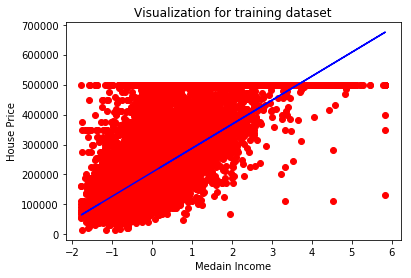

In [34]:
#visuliztion trining data 

plt.scatter(X_train1,y_train,color='red')
plt.plot(X_train1,regressor2.predict(X_train1),color='blue')
plt.xlabel('Medain Income')
plt.ylabel('House Price')
plt.title('Visualization for training dataset')
plt.show()


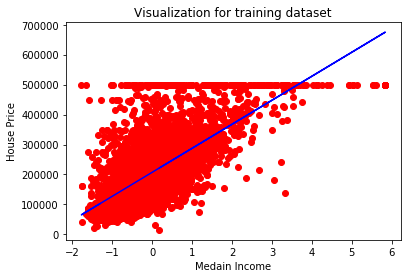

In [35]:
#for test dataset
plt.scatter(X_test1,y_test,color='red')
plt.plot(X_train1,regressor2.predict(X_train1),color='blue')
plt.xlabel('Medain Income')
plt.ylabel('House Price')
plt.title('Visualization for training dataset')
plt.show()


In [ ]:
#conclusion obeserving all the tested model Random forest provide the better result as compare to the 
# linear regression and Decision Tree